In [3]:
#importing libraries and data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# 1. Read the column description and ensure you understand each attribute well 

In [5]:
#dropping ID column because it has no relevance to the prediction
data=df.drop('ID',axis=1)

In [6]:
#checking for any null values
data.isnull().values.any()

False

# 2. Study the data distribution in each attribute, share your findings 

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


Replacing negative values from work experience column with 0 because work experience can never be negative

In [8]:
data['Experience'].replace([x for x in data['Experience'] if x<0],0,inplace=True)

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


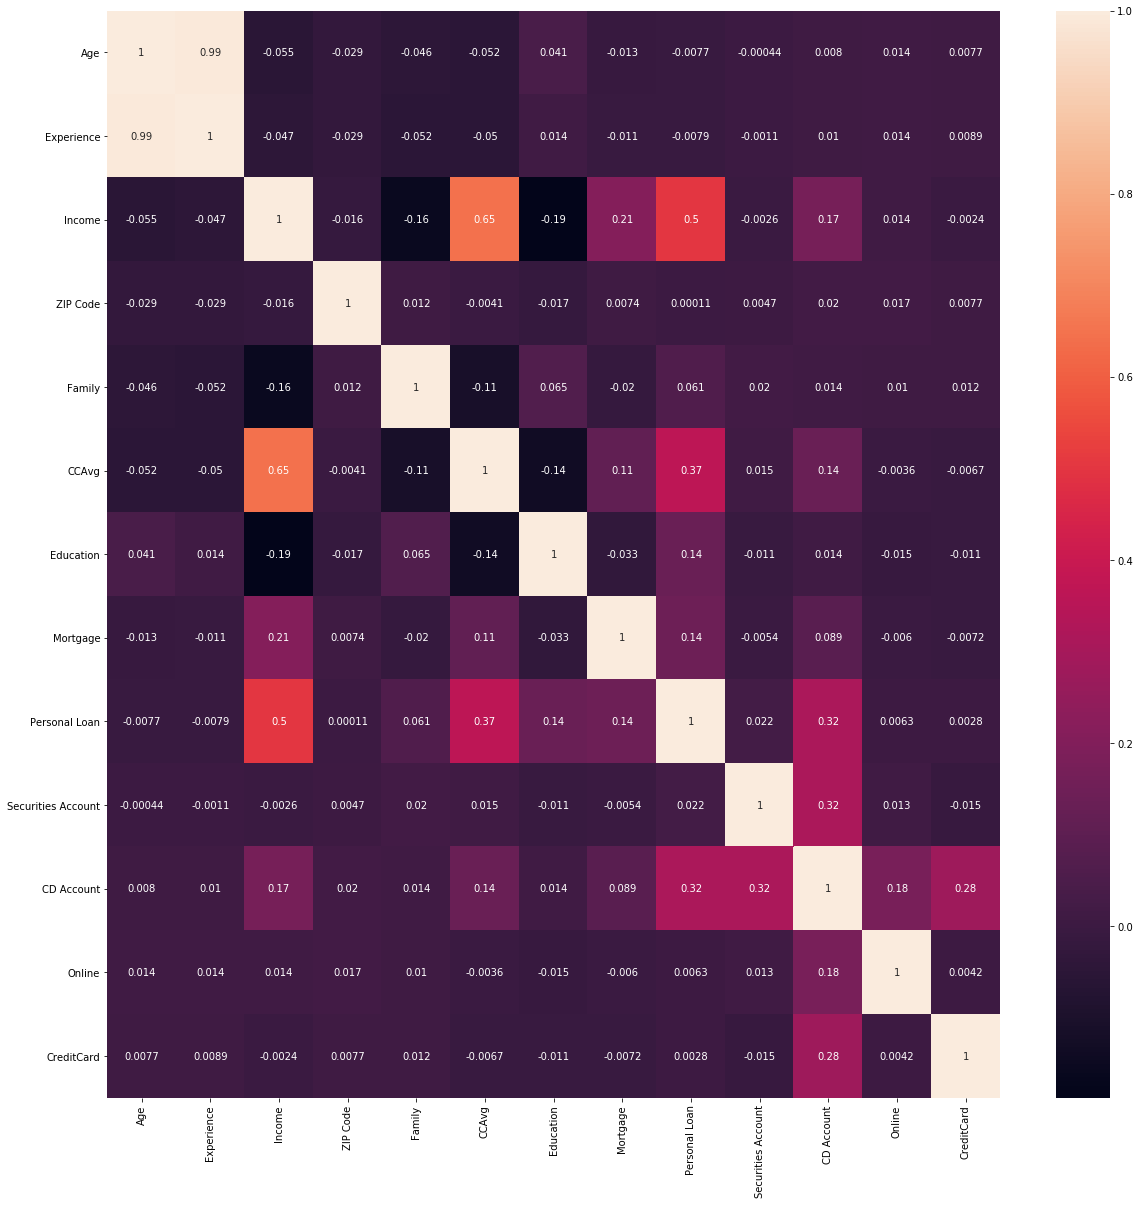

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)


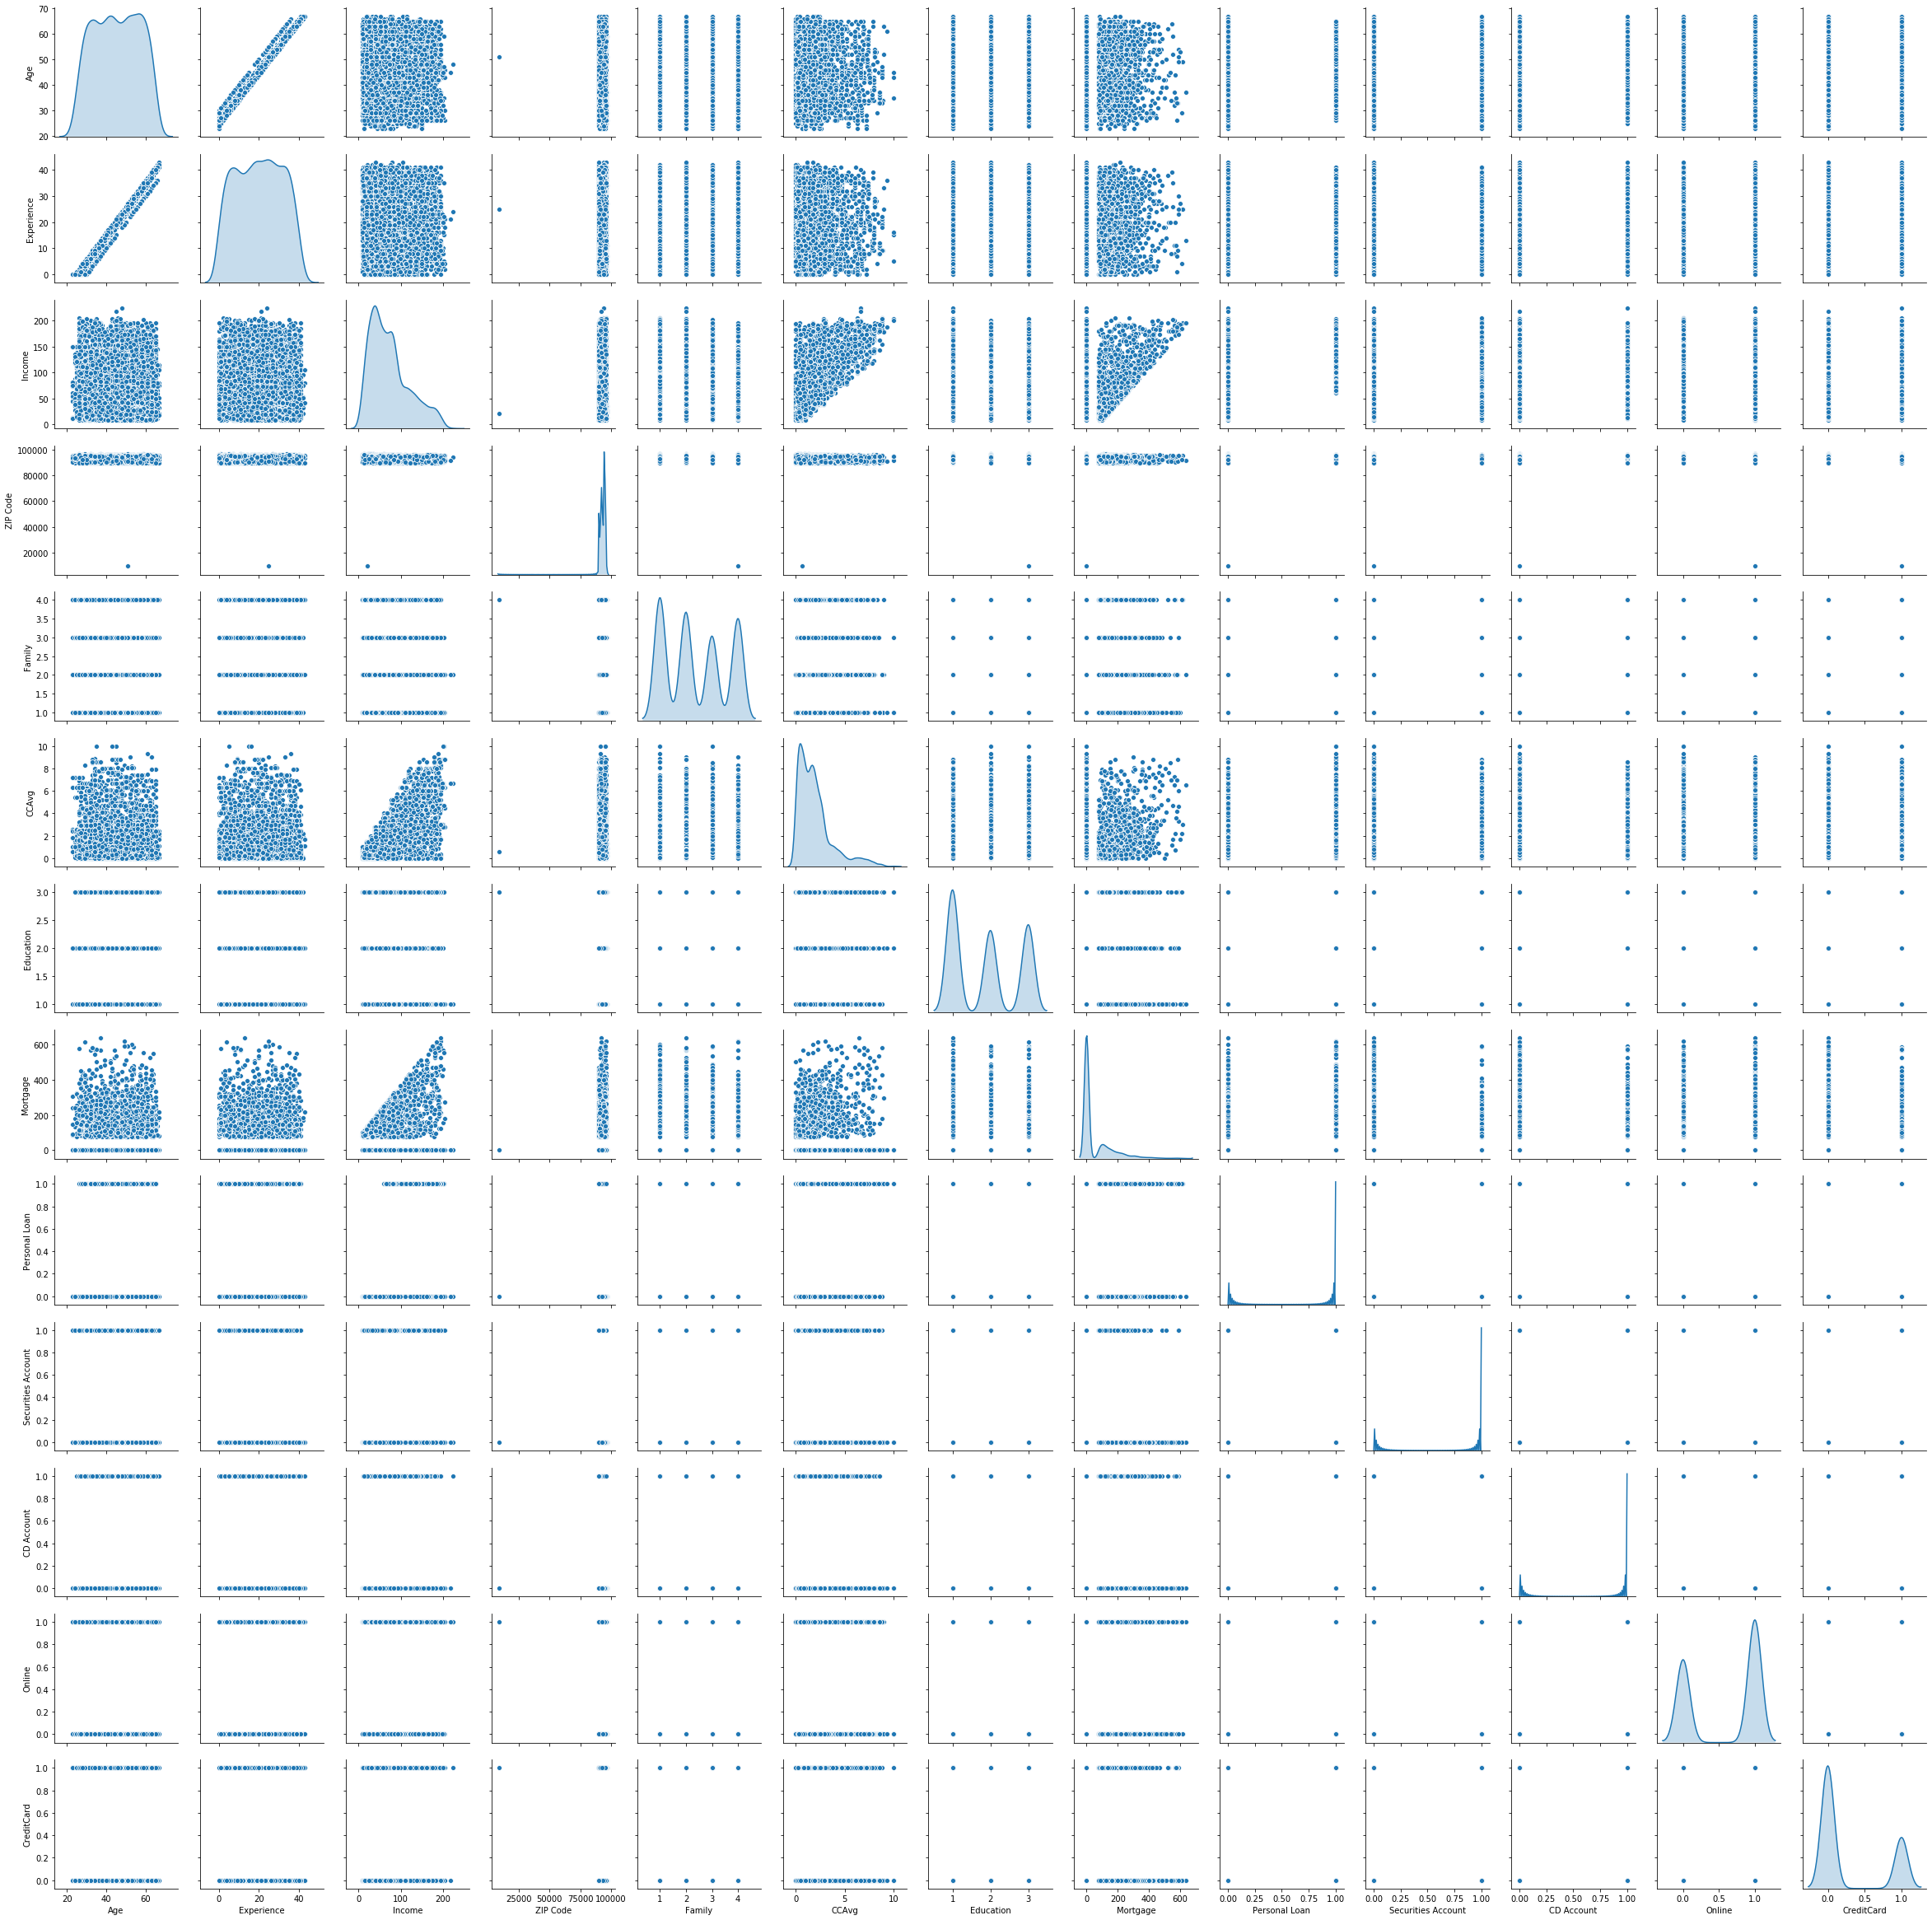

In [91]:
sns.pairplot(data,diag_kind='kde')

My findings
1. Mortgage has a very high standard deviation
2. Experience has a negative min value which can hamper the result and needs to be dealt with
3. Mortgage has very different mean and median values
4. Age and work experience are highly corelated (0.99)
5. Avg. spending(CCAvg) is fairly corelated to income (0.65)
6. Income is right skewed


# 3. Get the target column distribution. Your comments  

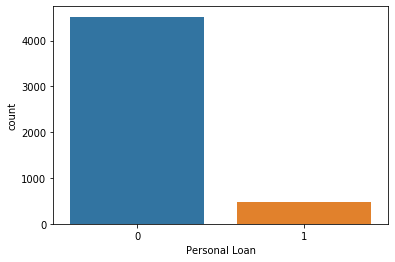

In [9]:
sns.countplot(data['Personal Loan'])

In [10]:
print(data.groupby('Personal Loan').size())

Personal Loan
0    4520
1     480
dtype: int64


In [11]:
data.groupby('Personal Loan').mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.148894,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


1. 10.61% people opted for personal loan


2. Average Income and amount spent on credit card of people is much higher for people who opted for loan than the people who didnt 

# 4. Split the data into training and test set in the ratio of 70:30 respectively 

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.loc[:,data.columns!='Personal Loan'],data['Personal Loan'],test_size=0.30, shuffle=True)

In [39]:
x_train.shape

(3500, 12)

In [40]:
y_train.shape

(3500,)

# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans 

# Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LR=LogisticRegression(solver='lbfgs')
LR.fit(x_train,y_train)
y_pred_lr=LR.predict(x_test)



In [46]:
precision = metrics.precision_score(y_test,y_pred_lr)
recall = metrics.recall_score(y_test,y_pred_lr)
print('Precision score: ',round(precision*100,2))
print('recall score: ',round(recall*100,2))
print('accuracy score: ',round((metrics.accuracy_score(y_test,y_pred_lr)*100),2))
f_value= round(((2*precision*recall)/(precision+recall)*100),2)
print('F measure: ',f_value)

Precision score:  51.22
recall score:  31.82
accuracy score:  91.33
F measure:  39.25


# K-NN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
k_range=range(1,26)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred_knn)
    scores_list.append(metrics.accuracy_score(y_test,y_pred_knn))
print (scores)
print(max(scores_list))



{1: 0.8853333333333333, 2: 0.9086666666666666, 3: 0.9026666666666666, 4: 0.906, 5: 0.9, 6: 0.906, 7: 0.8993333333333333, 8: 0.9066666666666666, 9: 0.8986666666666666, 10: 0.9, 11: 0.9013333333333333, 12: 0.9026666666666666, 13: 0.9053333333333333, 14: 0.9053333333333333, 15: 0.9066666666666666, 16: 0.9066666666666666, 17: 0.9066666666666666, 18: 0.9053333333333333, 19: 0.9046666666666666, 20: 0.9073333333333333, 21: 0.9073333333333333, 22: 0.9086666666666666, 23: 0.9086666666666666, 24: 0.9086666666666666, 25: 0.9106666666666666}
0.9106666666666666


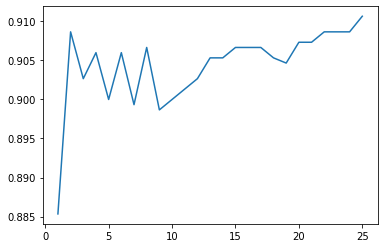

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)


model is most accurate for k=25 so, this will be used to retrain the data 

In [49]:
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
acc_score= round(metrics.accuracy_score(y_test,y_pred_knn)*100,2)
#acc_score= round(knn.score(y_test,y_pred_knn)*100,2)
precision_score= round(metrics.precision_score(y_test,y_pred_knn)*100,2)
recall_score= round(metrics.precision_score(y_test,y_pred_knn)*100,2)
print('Precision score: ',precision_score)
print('recall score: ',recall_score)
print('accuracy score: ',acc_score)
f_value= round(((2*precision*recall)/(precision+recall)*100),2)
print('F measure: ',f_value)

Precision score:  42.86
recall score:  42.86
accuracy score:  91.07
F measure:  39.25


# Naïve Bayes

In [50]:
from sklearn.naive_bayes import BernoulliNB
bnb= BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_nb=bnb.predict(x_test)
val=round(bnb.score(x_test,y_test)*100,2)
print('accuracy score for naive bayes is:', val)


accuracy score for naive bayes is: 89.93


# 6. Print the confusion matrix for all the above models

In [51]:
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,y_pred_lr)
print(cm_lr)

[[1328   40]
 [  90   42]]


In [52]:
cm_knn=confusion_matrix(y_test,y_pred_knn)
print(cm_knn)

[[1360    8]
 [ 126    6]]


In [53]:
cm_nb=confusion_matrix(y_test,y_pred_nb)
print(cm_nb)

[[1327   41]
 [ 110   22]]


# 7. Give your reasoning on which is the best model in this case and why it performs better?

If we take precision rate as the measure then accuracy of Logistic regression is the best and is the best model for this data.
Logistic regression performs better in this case because the dataset is random and dependent variable has no correlation with any of the independent variables 